<a href="https://colab.research.google.com/github/MazurovaNN/neural-network/blob/main/lesson2_dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [33]:
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

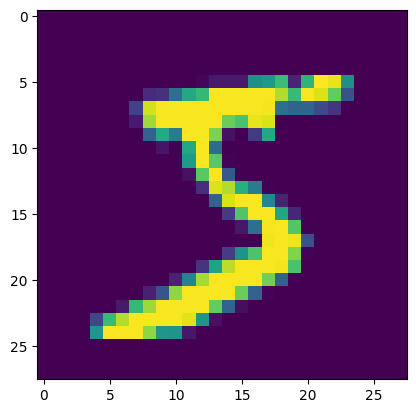

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

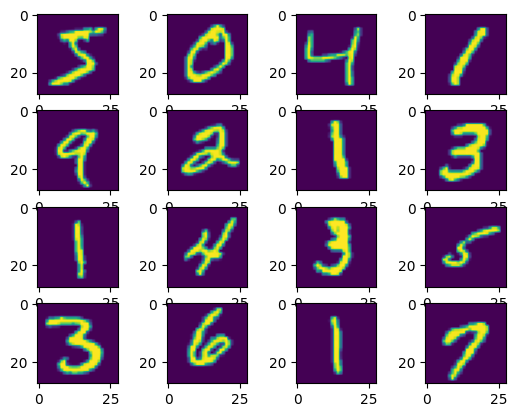

In [8]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [9]:
input_shape = (28, 28, 1)

In [10]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [11]:
model_1.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [14]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [15]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3218 - accuracy: 0.9089
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1636 - accuracy: 0.9527
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9633
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0981 - accuracy: 0.9710
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0818 - accuracy: 0.9757
CPU times: user 13.9 s, sys: 928 ms, total: 14.8 s
Wall time: 21.1 s


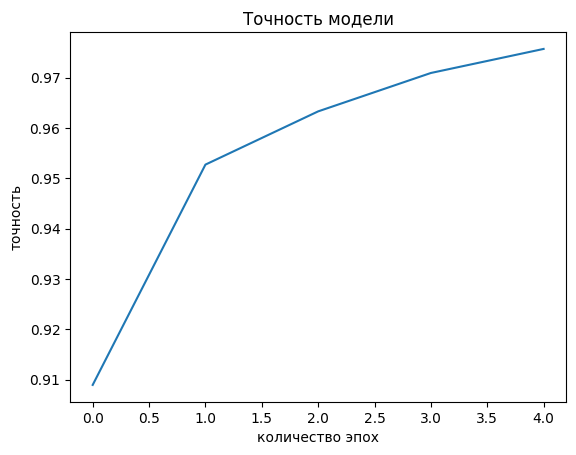

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

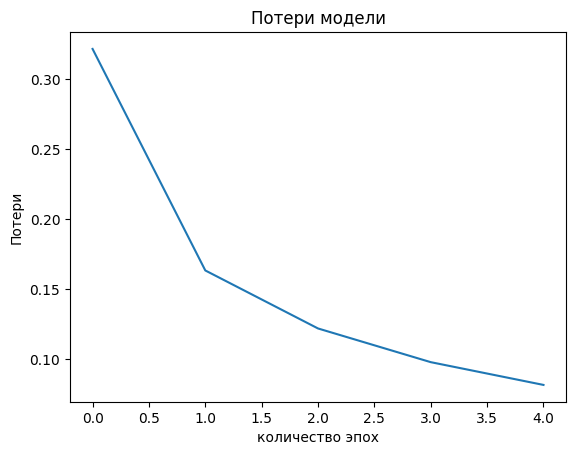

In [23]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [ ]:
scores = model_2.evaluate(x_test, y_test) print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

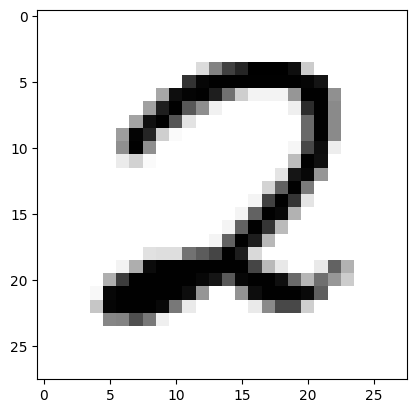

1/1 [==============================] - 0s 58ms/step
Цифра: 2


In [41]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28),
           cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("Цифра:", prediction)


In [42]:
img = image.load_img('3.jpg')
img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)
img = img.reshape(1,28,28)
img = img/255.0
prediction = model_2.predict(img)
prediction = np.argmax(prediction)
print("цифра:", prediction)

1/1 [==============================] - 0s 22ms/step
цифра: 3
